In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy import set_printoptions
set_printoptions(precision=3, threshold=5, edgeitems=4, suppress=True)



In [20]:
A = np.eye(9) * 0
edges = [[0, 1], [1, 2], [2, 0], [2,3], [3,4], [4,5], [5,3] ,[3,6] ,[ 6,7], [7,8], [6,8]]
for edge in edges:
    n1, n2 = edge[0], edge[1]
    A[n1][n2] = 1
    A[n2][n1] = 1
G = nx.from_numpy_matrix(A)


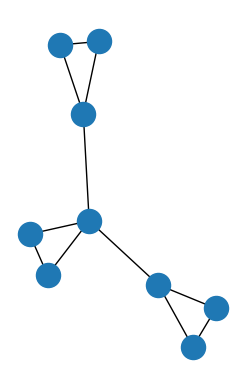

In [21]:
subax1 = plt.subplot(121)
nx.draw(G)   # default spring_layout

In [22]:
D = np.eye(9) * 2
D[3][3] = 3
D[2][2] = 3
D[6][6] = 3
print('D = ', D)

D =  [[2. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 2. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 3. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 3. ... 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. ... 2. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 3. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 2. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 2.]]


In [23]:
L = D - A
print(L)

[[ 2. -1. -1.  0. ...  0.  0.  0.  0.]
 [-1.  2. -1.  0. ...  0.  0.  0.  0.]
 [-1. -1.  3. -1. ...  0.  0.  0.  0.]
 [ 0.  0. -1.  3. ... -1. -1.  0.  0.]
 ...
 [ 0.  0.  0. -1. ...  2.  0.  0.  0.]
 [ 0.  0.  0. -1. ...  0.  3. -1. -1.]
 [ 0.  0.  0.  0. ...  0. -1.  2. -1.]
 [ 0.  0.  0.  0. ...  0. -1. -1.  2.]]


In [24]:
lambdas , U = np.linalg.eig(L)

idx = lambdas.argsort()[::-1]   
lambdas = lambdas[idx]
U = U[:,idx]
print(lambdas, U)

[ 4.924  3.732  3.     3.    ...  2.737  0.49   0.268 -0.151] [[ 0.12   0.23  -0.707  0.094 ...  0.223  0.333 -0.444 -0.274]
 [ 0.12   0.23   0.707 -0.094 ...  0.223  0.333 -0.444 -0.274]
 [-0.47  -0.628 -0.    -0.    ... -0.388  0.17  -0.325 -0.316]
 [ 0.665 -0.     0.    -0.    ... -0.548 -0.24   0.    -0.446]
 ...
 [-0.17  -0.    -0.     0.318 ...  0.316 -0.47   0.    -0.388]
 [-0.47   0.628  0.    -0.    ... -0.388  0.17   0.325 -0.316]
 [ 0.12  -0.23  -0.    -0.624 ...  0.223  0.333  0.444 -0.274]
 [ 0.12  -0.23  -0.     0.624 ...  0.223  0.333  0.444 -0.274]]


In [25]:
print('U', U)
print('every column is a eigenvector')

print('lambdas', lambdas)

U [[ 0.12   0.23  -0.707  0.094 ...  0.223  0.333 -0.444 -0.274]
 [ 0.12   0.23   0.707 -0.094 ...  0.223  0.333 -0.444 -0.274]
 [-0.47  -0.628 -0.    -0.    ... -0.388  0.17  -0.325 -0.316]
 [ 0.665 -0.     0.    -0.    ... -0.548 -0.24   0.    -0.446]
 ...
 [-0.17  -0.    -0.     0.318 ...  0.316 -0.47   0.    -0.388]
 [-0.47   0.628  0.    -0.    ... -0.388  0.17   0.325 -0.316]
 [ 0.12  -0.23  -0.    -0.624 ...  0.223  0.333  0.444 -0.274]
 [ 0.12  -0.23  -0.     0.624 ...  0.223  0.333  0.444 -0.274]]
every column is a eigenvector
lambdas [ 4.924  3.732  3.     3.    ...  2.737  0.49   0.268 -0.151]


In [26]:
x = [1, 1, 0, 0, 1, 1, 0 , 1, 1]
x = np.array(x).reshape(9, 1)
output = U.T @ x
print(output.reshape(-1) > 0.0001)
print(  output.reshape(-1).tolist())

[ True False False False ...  True  True False False]
[0.1404433971850078, 9.992007221626409e-16, 9.633119223171441e-16, 2.4424906541753444e-15, -6.4427629897778615e-15, 1.5242054583187976, 0.3896774659137263, -2.220446049250313e-16, -1.8722245713528527]


In [29]:
x = [1, 1, 2, 2, 1, 1]
x = np.array(x).reshape(6, 1)
print(U.T @ x )

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 9)